#**Big Data Analytics Project - Traffic Collision Prediction**
[project mates' names redacted] Caleb Yam

#Part 0: Introduction
In this project, we will explore the general inquiry of traffic collison accident data in New York City from 2019 to the present (mid-2023). Our main objective with this project is to predict whether or not people get injured/killed or not from car accidents in New York City depending on the **specific location**, **time**, and **vehicle type**.

We selected a Kaggle dataset of recent collision accidents in New York City, which is kept relatively up to date and includes data from the beginning of 2019, until a few months ago in mid-2023 (which was as recently updated as possible by this Kaggle data set).

The findings of this project are described below in this notebook. Below every visualization, model, and finding, we explained the motivation of the analysis, the key understandings, and how this better informs our discussion in solving our main objective.

#Part 1: Loading and Data Cleaning

First off, we will download and import the necessary libraries and packages useful for the entire comprehensive analysis of our project. Next, we will import our [Kaggle dataset](https://www.kaggle.com/datasets/ishmaelkiptoo/motor-vehicle-collisions) and mount it to our Google Drive. We will apply the necessary functions to download, zip, and un-zip the dataset onto this notebook. Then, we will convert our dataset into a dataframe that we will work with for the rest of data cleaning and exploratory data analysis of this project.

In [ ]:
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
%%capture
!apt update
!pip install kaggle

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
# !mkdir ~/.kaggle

In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Download dataset
!!kaggle datasets download -d ishmaelkiptoo/motor-vehicle-collisions

In [ ]:
# Unzip folder in Colab content folder
!unzip /content/motor-vehicle-collisions.zip

Next, we store the **Motor Vehicle Collisions csv_file** into a dataframe.

In [ ]:
# TODO: Read the csv file and save it to a dataframe called "df_properties"
df_properties = pd.read_csv("Motor_Vehicle_Collisions.csv")

# Check out the information
df_properties.info()

<ipython-input-13-b11bc0325d3f>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_properties = pd.read_csv("Motor_Vehicle_Collisions.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034019 entries, 0 to 2034018
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [ ]:
#original dataframe
df_properties.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


***Data Cleaning***

The code performs several steps of data cleaning and transformation on a DataFrame `df_properties` into `df_cleaned`:

1. **Removing Rows with Specific Null Values**:
- The code uses `df_temp.dropna(subset=[...], inplace=True)` to remove rows with null values in specific columns.
- It drops rows where columns related to the crash date, time, location (which also includes attributes such as geographical coordinates, zip code), and accident identification have at least one null value. These columns more specifically are (`CRASH DATE`, `CRASH TIME`, `LATITUDE`, `LONGITUDE`, `LOCATION`, `ZIP CODE`, `BOROUGH`, and `COLLISION_ID`).



In [ ]:
#Data Cleaning
df_temp = df_properties

#filter out rows that have null values in CRASH DATE, CRASH TIME, LATITUDE,
#LONGITUDE, LOCATION, ZIP CODE, BOROUGH, COLLISION_ID
df_temp.dropna(subset=['CRASH DATE', 'CRASH TIME', 'LATITUDE', 'LONGITUDE',
                       'LOCATION', 'ZIP CODE', 'BOROUGH', 'COLLISION_ID'],
               inplace=True)

2. **Filtering Street Names**:
- Remove rows where all of the street name columns (`ON STREET NAME`, `CROSS STREET NAME`, `OFF STREET NAME`) are all null. This ensures at least one of these street name fields is non-null in the remaining date since we would need to analyze street names for future analysis.
- The DataFrame is further filtered to retain rows where either both 'ON STREET NAME' and 'CROSS STREET NAME' are non-null, or both are null.
- This step is based on the assumption that an accurate location of an accident requires either both on street and cross street names or an off street name.

In [ ]:
#filter rows that have all null values in ON STREET NAME, CROSS STREET NAME, OFF STREET NAME
df_temp.dropna(subset=['ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME'], how='all', inplace=True)

#we realized for accurate location of the accident, we need to have a combination
#of on street name and cross street name. Off street name depicts a more accurate
#location because most indicate bridges or specific locations.
#filter out rows that have ONLY have null values onm either ON STREET NAME or CROSS STREET NAME
df_temp = df_temp[~((df_temp['ON STREET NAME'].isna() & df_temp['CROSS STREET NAME'].notna()) | (df_temp['ON STREET NAME'].notna() & df_temp['CROSS STREET NAME'].isna()))]

3. **Filtering Vehicle and Contributing Factor Vehicle Information**:
- The code removes rows where all contributing factor columns and vehicle type columns are null. This step helps in focusing on records where at least one contributing factor vehicle or vehicle type is known.

> Indented block



In [ ]:
#filter out rows that have all null values in CONTRIBUTING FACTOR VEHICLE 1,
#CONTRIBUTING FACTOR VEHICLE 2, CONTRIBUTING FACTOR VEHICLE 3,
#CONTRIBUTING FACTOR VEHICLE 4, CONTRIBUTING FACTOR VEHICLE 5
df_temp.dropna(subset=['CONTRIBUTING FACTOR VEHICLE 1',
                       'CONTRIBUTING FACTOR VEHICLE 2',
                       'CONTRIBUTING FACTOR VEHICLE 3',
                       'CONTRIBUTING FACTOR VEHICLE 4',
                       'CONTRIBUTING FACTOR VEHICLE 5'],
               how='all', inplace=True)

#filter rows that have all null values in VEHICLE TYPE CODE 1,
#VEHICLE TYPE CODE 2, VEHICLE TYPE CODE 3, VEHICLE TYPE CODE 4,
#VEHICLE TYPE CODE 5
df_temp.dropna(subset=['VEHICLE TYPE CODE 1',
                       'VEHICLE TYPE CODE 2',
                       'VEHICLE TYPE CODE 3',
                       'VEHICLE TYPE CODE 4',
                       'VEHICLE TYPE CODE 5'],
               how='all', inplace=True)

<ipython-input-17-35a657cc35fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.dropna(subset=['CONTRIBUTING FACTOR VEHICLE 1',
<ipython-input-17-35a657cc35fc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.dropna(subset=['VEHICLE TYPE CODE 1',


4. **Filtering Out Rows with only 'Unspecified' and null Values**:
- Although we have removed all groups of columns with only null values, there are still columns that contain 'Unspecified' values. These values do not provide any information about our objective, so we will remove these rows as well.
- The function `filter_out_rows_with_Unspecified_only` is used to remove rows where certain columns contain only 'Unspecified' or null values.
- This function is applied to vehicle contributing factors, vehicle type codes, and street names.

In [ ]:
def filter_out_rows_with_Unspecified_only(df, columns):
    def is_only_Unspecified(row):
        return all((row[col] != 'Unspecified' and row[col] != None) for col in columns)

    return df[df.apply(is_only_Unspecified, axis=1)]

In [ ]:
#filter rows that only contain 'Unspecified' or null values in all of the following columns
df_temp = filter_out_rows_with_Unspecified_only(df_temp, ['CONTRIBUTING FACTOR VEHICLE 1',
                                                      'CONTRIBUTING FACTOR VEHICLE 2',
                                                      'CONTRIBUTING FACTOR VEHICLE 3',
                                                      'CONTRIBUTING FACTOR VEHICLE 4',
                                                      'CONTRIBUTING FACTOR VEHICLE 5'])


df_temp = filter_out_rows_with_Unspecified_only(df_temp, ['VEHICLE TYPE CODE 1',
                                                      'VEHICLE TYPE CODE 2',
                                                      'VEHICLE TYPE CODE 3',
                                                      'VEHICLE TYPE CODE 4',
                                                      'VEHICLE TYPE CODE 5'])


df_temp = filter_out_rows_with_Unspecified_only(df_temp, ['ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME'])

5. **Removing Duplicates**:
- We also removed duplicate entries based on the `COLLISION_ID` column to ensure each collision is unique in the dataset.

In [ ]:
#filter duplicates for COLLISION_ID
df_temp.drop_duplicates(subset=['COLLISION_ID'], inplace=True)

6. **Creating a Combined Street Name Column**:
- A new column `ON-CROSS STREET NAME` is created by concatenating `ON STREET NAME` and `CROSS STREET NAME`. This is because unlike cross street names that indicate a unique street location like bridges, we need both on and cross street names to find the approximate street location.

In [ ]:
#since we can locate a specific road through the combination of on street and cross street or off street itself
#we combined on street and cross street to a new column ON-CROSS STREET
df_temp['ON-CROSS STREET NAME'] = df_temp['ON STREET NAME'] + ' ' + df_temp['CROSS STREET NAME']

7. **Filtering Based on Date**:
- Rows with a `CRASH DATE` later than January 1, 2019, are retained. This is done using a comparison with `pd.to_datetime`.

In [ ]:
#filter rows that have CRASH DATE later than 2019/01/01
df_temp = df_temp[pd.to_datetime(df_temp['CRASH DATE']) > dt.datetime(2019,1,1)]

8. **Combining Date and Time into a Single Column**:
- A new `DATE_TIME` column is created by combining `CRASH DATE` and `CRASH TIME` into a single datetime object.
- This `DATE_TIME` column is then converted to an integer to be later used for our prediction model.

In [ ]:
#add the date and time to form a singular date_time
df_temp['DATE_TIME'] = pd.to_datetime(df_temp['CRASH DATE'] + ' ' + df_temp['CRASH TIME'])
df_temp['DATE_TIME'] = df_temp['DATE_TIME'].astype('int64') // 10**9

9. **Redefining the Latitude Longitude**:
- We had to filter collisions at this point of the data analysis, and that came acrossa as narrowing the scope of our dataset to the rough latitudes and longitudes of New York City. It came to our attention that some of the collision data had locations, in terms of longitude and latiude, that were outside of the geographical boundaries of NYC, which we also saw gave an error while running the visual heat maps.

In [ ]:
# df_cleaned = df_cleaned[df_cleaned['LONGITUDE'] > -80]
# df_cleaned = df_cleaned[df_cleaned['LONGITUDE'] < -70]
# df_cleaned = df_cleaned[df_cleaned['LATITUDE'] > 39]
# df_cleaned = df_cleaned[df_cleaned['LONGITUDE'] < 45]


df_temp = df_temp[df_temp['LATITUDE'] > 40.4]
df_temp = df_temp[df_temp['LATITUDE'] < 41]
df_temp = df_temp[df_temp['LONGITUDE'] > -74.3]
df_temp = df_temp[df_temp['LONGITUDE'] < -73.6]

10. **Resetting the Index**:
- Finally, the index of the data frame is reset for cleanliness and to reflect the removals and filtering, we have the new resulting data frame represented by `df_cleaned`.

In [ ]:
#reset the index
df_cleaned = df_temp.reset_index(drop=True)

In [ ]:
pd.set_option('display.max_columns', None)
df_cleaned.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,ON-CROSS STREET NAME,DATE_TIME
0,12/14/2021,20:03,BROOKLYN,11226.0,40.650680,-73.958810,"(40.65068, -73.95881)",NaN,NaN,878 FLATBUSH AVENUE,4.0,0.0,0,0,0,0,4,0,Steering Failure,NaN,NaN,NaN,NaN,4486991,Sedan,NaN,NaN,NaN,NaN,NaN,1639512180
1,04/12/2022,19:56,BROOKLYN,11203.0,40.650110,-73.930214,"(40.65011, -73.930214)",UTICA AVENUE,SNYDER AVENUE,NaN,1.0,0.0,1,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4522136,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,UTICA AVENUE SNYDER AVENUE,1649793360
2,04/24/2022,20:13,QUEENS,11419.0,40.692610,-73.811430,"(40.69261, -73.81143)",NaN,NaN,102-24 VANWYCK EXPRESSWAY,0.0,0.0,0,0,0,0,0,0,Aggressive Driving/Road Rage,NaN,NaN,NaN,NaN,4521859,Sedan,NaN,NaN,NaN,NaN,NaN,1650831180
3,04/24/2022,15:21,QUEENS,11101.0,40.745235,-73.937706,"(40.745235, -73.937706)",THOMSON AVENUE,SKILLMAN AVENUE,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4521590,Sedan,Sedan,NaN,NaN,NaN,THOMSON AVENUE SKILLMAN AVENUE,1650813660
4,04/07/2022,14:14,MANHATTAN,10017.0,40.748158,-73.970330,"(40.748158, -73.97033)",1 AVENUE,EAST 41 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Passing or Lane Usage Improper,NaN,NaN,NaN,4522242,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1 AVENUE EAST 41 STREET,1649340840


#**Part 2: Exploratory Data Analysis**
In this next part, we will explore different features of the nature of the crashes themselves, and the different specific attributes of the collision data, to gain deeper insight into the patterns of how these collisions are occurring.



In [ ]:
df_cleaned["CRASH DATE"] = df_cleaned["CRASH DATE"] + " " + df_cleaned["CRASH TIME"]
df_cleaned["CRASH DATE"] = pd.to_datetime(df_cleaned["CRASH DATE"])
df_cleaned.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,ON-CROSS STREET NAME,DATE_TIME
0,2021-12-14 20:03:00,20:03,BROOKLYN,11226.0,40.650680,-73.958810,"(40.65068, -73.95881)",NaN,NaN,878 FLATBUSH AVENUE,4.0,0.0,0,0,0,0,4,0,Steering Failure,NaN,NaN,NaN,NaN,4486991,Sedan,NaN,NaN,NaN,NaN,NaN,1639512180
1,2022-04-12 19:56:00,19:56,BROOKLYN,11203.0,40.650110,-73.930214,"(40.65011, -73.930214)",UTICA AVENUE,SNYDER AVENUE,NaN,1.0,0.0,1,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4522136,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,UTICA AVENUE SNYDER AVENUE,1649793360
2,2022-04-24 20:13:00,20:13,QUEENS,11419.0,40.692610,-73.811430,"(40.69261, -73.81143)",NaN,NaN,102-24 VANWYCK EXPRESSWAY,0.0,0.0,0,0,0,0,0,0,Aggressive Driving/Road Rage,NaN,NaN,NaN,NaN,4521859,Sedan,NaN,NaN,NaN,NaN,NaN,1650831180
3,2022-04-24 15:21:00,15:21,QUEENS,11101.0,40.745235,-73.937706,"(40.745235, -73.937706)",THOMSON AVENUE,SKILLMAN AVENUE,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4521590,Sedan,Sedan,NaN,NaN,NaN,THOMSON AVENUE SKILLMAN AVENUE,1650813660
4,2022-04-07 14:14:00,14:14,MANHATTAN,10017.0,40.748158,-73.970330,"(40.748158, -73.97033)",1 AVENUE,EAST 41 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Passing or Lane Usage Improper,NaN,NaN,NaN,4522242,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1 AVENUE EAST 41 STREET,1649340840


##2.1 Time of Collisions
First off, we would like to examine **WHEN** these collisions are happening. This would include different intervals and measurements of time such as year, month, day of the week, and even hour of the day. We will look into **WHEN** these crashes are happening by filtering the cleaned data frame, to filter it by year from 2019 until now, and then also plot this is a barplot to get a visual sense of how the collisons look like by year.

###2.1.1 Collisions by Year

In [ ]:
# First let's look at WHEN these collisions are happening

# first let's check by year
temp = df_cleaned
temp['YEAR'] = temp['CRASH DATE'].dt.year
crashes_by_year = temp['YEAR'].value_counts().reset_index()
crashes_by_year.columns = ['YEAR', 'COUNT']
crashes_by_year

,YEAR,COUNT
0,2019,25626
1,2020,12643
2,2022,12602
3,2021,12177
4,2023,10039


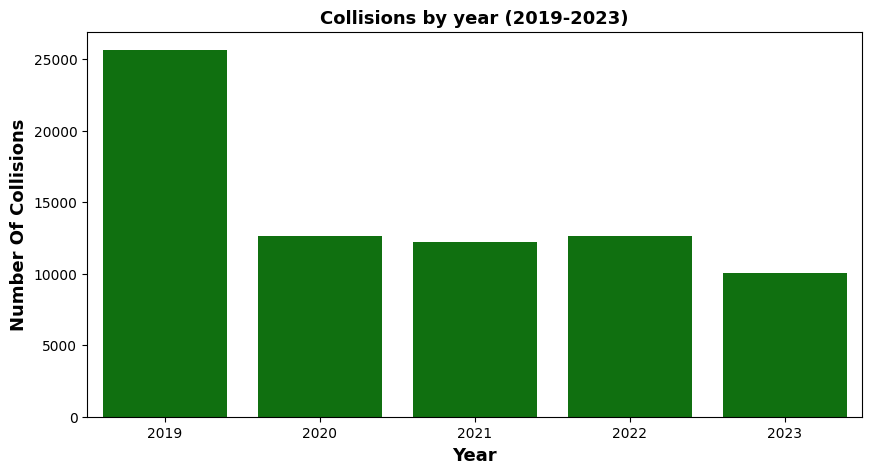

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=crashes_by_year, x="YEAR", y="COUNT", palette = ['GREEN'])
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Year", fontweight="bold", fontsize=13)
plt.title("Collisions by year (2019-2023)", fontweight="bold", fontsize=13)

plt.show()


**Takeaways**
*   The number of collisions significantly decreased after 2019, which is likely due to the isolation and stay-at-home policies enacted after the COVID-19 pandemic. Especially as the initial epicenter of the COVID-19 pandemic, the dramatic decrease in collisions reflects the less frequent traffic and in-flow of traffic that would be normally seen in NYC. What's interesting to see is that these collision frequencies maintained this low amount even up until the present day in the tail-end of 2023. Maybe this might reflect how the after effects of the COVID-19 pandemic, whether that was the epidemiological impact, general consensus from the population and metropolitan area, or strict policies that discouraged in-person commerce, traffic, and tourism, are quite powerful.
*   While also taking into account that 2023 is not yet over yet, as this data set captures collision data until mid-2023, maybe going forward, the collision data may revert closer to pre-pandemic levels.

Now, let's perhaps look into the other time attributes of these NYC-area collisions, such as by month, day, and time of the day.


###2.1.2 Collisions by Month

In [ ]:
# collisions by month
temp = df_cleaned
temp['MONTH'] = temp['CRASH DATE'].dt.month
crashes_by_month = temp['MONTH'].value_counts().reset_index()
crashes_by_month.columns = ['MONTH', 'COUNT']
crashes_by_month.sort_values(by='MONTH', inplace=True)
crashes_by_month

,MONTH,COUNT
1,1,6583
7,2,6227
2,3,6464
10,4,5343
5,5,6339
4,6,6344
3,7,6398
6,8,6248
0,9,6612
8,10,5905


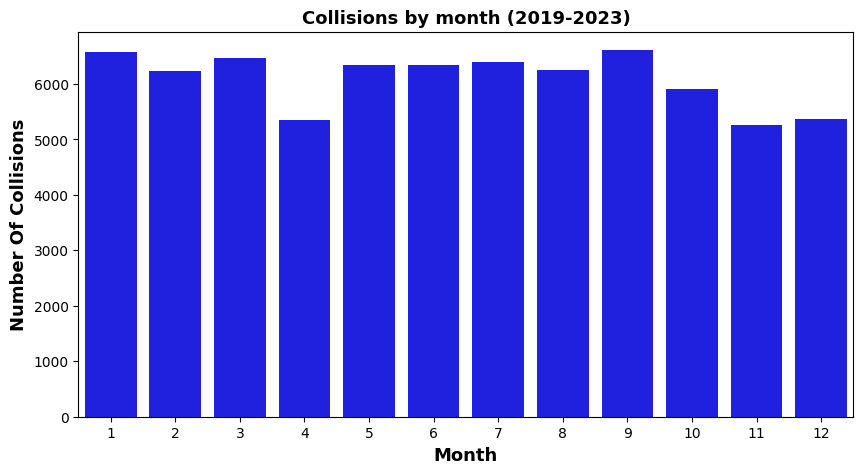

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=crashes_by_month, x="MONTH", y="COUNT", palette = ['BLUE'])
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Month", fontweight="bold", fontsize=13)
plt.title("Collisions by month (2019-2023)", fontweight="bold", fontsize=13)

plt.show()

**Takeaways**
*   There is a noticable lower number of collisions in April as well as the months November and December. This was a bit surprising for us given that November and December are some of the coldest months of the year.
* The drop in collisions might also reflect the looming effects of the COVID-19 pandemic during 2020 and the surge in 2021, as that was the hardest hit month in NYC history which thus prompted virtually little to no driving, let alone in person interaction, during April 2020. Such a significant time when there were very few people driving during that month thus reflects this sharp drop in the data.
*   However, upon further thinking we may speculate that perhaps fewer people are actually driving within those winter months, resulting in fewer collisions overall. Whether that is holiday season in New York, thus prompting seasonal or life-long residents to leave the city during that time, thus contributing to less traffic and therefore collisions, or harsh winter driving conditions that prompts people to be safer drivers, or just drive at a much less frequent rate.

* Furthermore, we recognize that in December 2020, there was a significant hike in COVID-19 cases, whether that was attributed to the holiday season traveling, or the Alpha variant coming in from the UK. Also, in November to December 2021, there was the emergence of the Omicron variant of the COVID-19 virus, which had a devastating increase in the number of cases during this time in NYC, which thus impacted in-person activities, commerce, travel, tourism, and subsequently, car collisions.


###2.1.3 Collisions by Day of Week


In [ ]:
# collisions by day
from datetime import date

temp = df_cleaned
temp['DAY'] = temp['CRASH DATE'].apply(lambda x: x.weekday())
crashes_by_day = temp['DAY'].value_counts().reset_index()
crashes_by_day.columns = ['DAY', 'COUNT']
crashes_by_day.sort_values(by='DAY', inplace=True)

# monday is 0, sunday is 6
crashes_by_day

,DAY,COUNT
4,0,10321
3,1,10644
2,2,10842
1,3,11082
0,4,11829
5,5,9774
6,6,8595


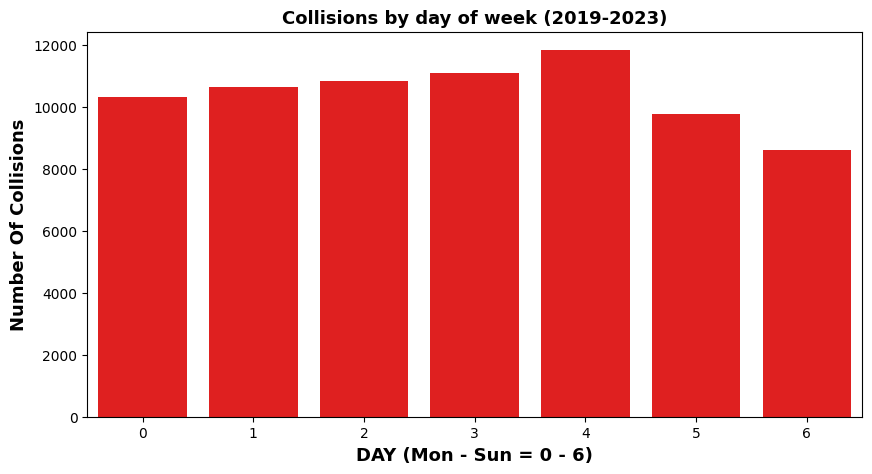

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=crashes_by_day, x="DAY", y="COUNT", palette = ['RED'])
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("DAY (Mon - Sun = 0 - 6)", fontweight="bold", fontsize=13)
plt.title("Collisions by day of week (2019-2023)", fontweight="bold", fontsize=13)

plt.show()

**Takeaways**
*   There is a decreasing number of collisions after Friday, which is when it's the highest. And we see the gradual increase of collisions as the weekdays progress, from Monday to Friday.
*   This is expected as more people will be commuting from and to work on the weekdays, especially whether that is within NYC traffic or people from the surrounding suburbs in the metropolitan area coming in for work, while most people do not generally have to work on the weekend. Even as NYC is a city coveted for tourism and leisure, the work culture still holds the weekday traffic pattern. People from outside the city thus also might not feel incline to drive into NYC on weekends.
* Additionally, Friday may be a peak as people may go out celebrating on Friday nights, whether that is for leisure or by nature of the work culture, that Friday remains the most popular day to celebrate the end of the work week. Moreover, as Friday remains to be the status quo day to celebrate and go-out, this does include various forms of high alcohol and drug consumption in certain areas of NYC, which does prompt people to either be under the influence or more people will call taxi cab services or ride shares at a higher rate than normal, thus also probably leading to more cars on the road late at night, and thus more frequent car accidents.
*   Contrastingly, Sunday may be particularly low as it is religiously known as a rest day for many cultures, or even as the accepted norm as the day of the week of ultimate leisure. Saturday's low collision incidence might also be attributed for this same reason, as it is celebrated as the day of worship and rest, especially in Judaism, where NYC has one of the largest Jewish populations in the United States.
* Interestingly, as the world returns to some form of normalcy as NYC tries to recover from the COVID-19 pandemic's immense toll and isolation, things such as work from home policies or hybrid working schedules, will be worth noting. It is unclear if the current trends here from days of the week accurately reflects such collision incidence.


###2.1.4 Collisions by Hour of Day

In [ ]:
# collisions by hour
temp = df_cleaned
temp['HOUR'] = temp['CRASH DATE'].dt.hour
crashes_by_hour = temp['HOUR'].value_counts().reset_index()
crashes_by_hour.columns = ['HOUR', 'COUNT']
crashes_by_hour.sort_values(by='HOUR', inplace=True)
crashes_by_hour

,HOUR,COUNT
14,0,2866
19,1,1311
21,2,1101
23,3,1004
22,4,1048
20,5,1109
18,6,1767
16,7,2378
8,8,3765
12,9,3263


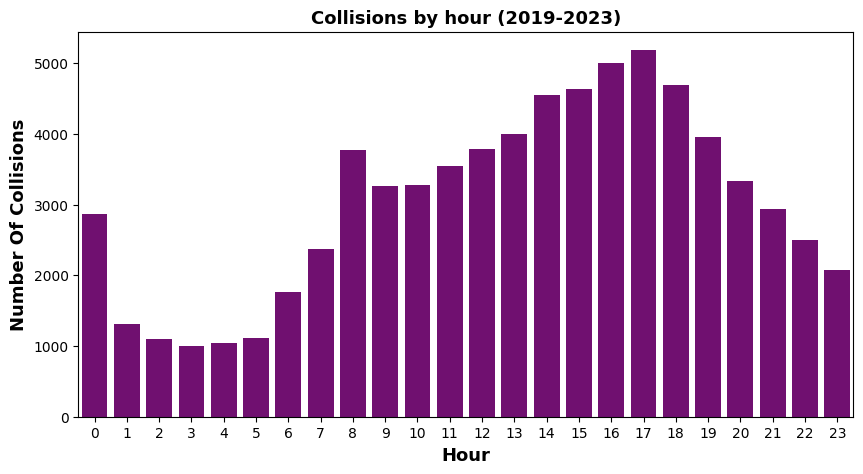

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=crashes_by_hour, x="HOUR", y="COUNT", palette = ['PURPLE'])
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Hour", fontweight="bold", fontsize=13)
plt.title("Collisions by hour (2019-2023)", fontweight="bold", fontsize=13)

plt.show()

**Takeaways**
* As the data set distinguishes collisions by military time to be all comprehensive, hour 0 is midnight, and hours 13 through 23 represent 12 pm to 11 pm.
*   We see that there is an increasing number of collisions up until 5 pm, and there is also a noticable peak of collisions at 8 am.
*   This data is expected as most people will traditionally have work and school from 9 am to 5 pm, meaning they must begin commuting at 8 am and leave after 5, as shown by the steady decrease. As 5 pm is the beginning of evening rush hour, the number of active vehicles throughout the city will be highest at this moment.
*   Contrastingly, most people are asleep during the AM hours which is reasonably why the hours between 1 am and 6 am are so low. Interesting to note, we do see how from midnight compared to 1 am, there is a dramatic decrease in collisions, which might point to how the city's respected bedtime is around midnight, reflected through late-night culture and night-life.


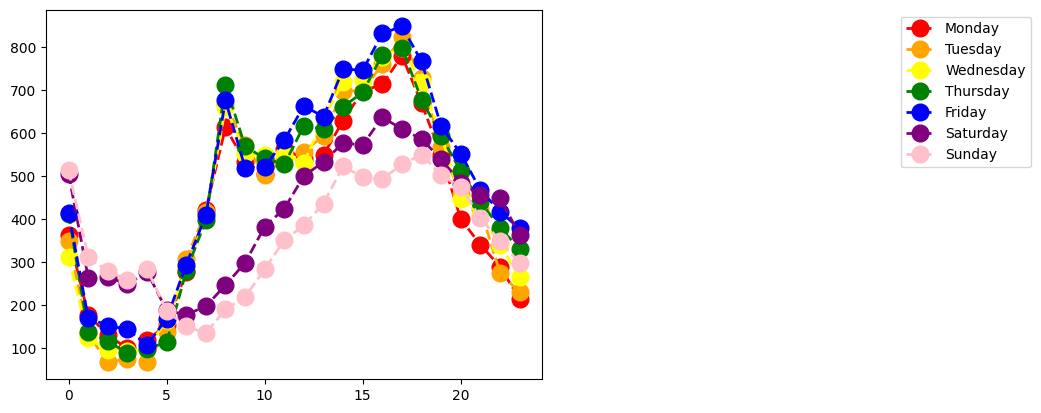

In [ ]:
days_of_week = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
temp = df_cleaned
temp['DAY'] = temp['CRASH DATE'].apply(lambda x: x.weekday())
temp['HOUR'] =  temp['CRASH DATE'].dt.hour
colors = ['red','orange','yellow','green','blue','purple','pink']

for i in range(7):
  day = days_of_week[i]

  filtered_by_day = temp[temp['DAY'] == i]
  crashes_by_hour = filtered_by_day['HOUR'].value_counts().reset_index()
  crashes_by_hour.columns = ['HOUR', 'COUNT']
  crashes_by_hour.sort_values(by='HOUR',inplace=True)

  plt.plot(crashes_by_hour['HOUR'], crashes_by_hour['COUNT'], color=colors[i], marker='o', linestyle='dashed',
     linewidth=2, markersize=12, label=day)
plt.legend(bbox_to_anchor=[2, 1])


**Takeaways**
*   Replotting this data by the hour of the day to also be laid on top of being based on day of the week is consistent with everything we've expected and plotted so far.
*   Note that there is not noticable peak at 8 am anymore for Saturday and Sunday which further corroborates the hypothesis that the spike is due to workers heading to work, and students heading to school, as most people do not have a strict, urgent morning routine on the weekends that people ought to be at.
*   However, as we also pay attention to the tail end of the graph, showing how Saturday and Sunday generally hover above the number of collisions for the weekdays. This is likely due to the stricter bedtimes that people set throughout the weekdays knowing they have to get up early tomorrow, whereas people are likely staying out on these weekends. This might also be because of the active late night culture present in NYC on Fridays and Saturdays, as the city that never sleeps, and as people are more likely to go out to celebrate the end of the week.  



#2.2 Locations of Collisions
Now **WHERE** are these collisions happening more? Which of the five boroughs is more prone to accidents? We will thus filter our cleaned data frame by borough, and count the collision frequency by these five boroughs. Then, to get a good visual sense of the location of where the most accidents occur, we will then plot on a bar plot.
###2.2.1 Collisions by Borough


In [ ]:
df_cleaned['BOROUGH'] = df_cleaned['BOROUGH'].astype(str)
crashes_by_borough = df_cleaned['BOROUGH'].value_counts().reset_index()
crashes_by_borough.columns = ['BOROUGH', 'COUNT']
crashes_by_borough

,BOROUGH,COUNT
0,BROOKLYN,21254
1,QUEENS,19003
2,MANHATTAN,17295
3,BRONX,13089
4,STATEN ISLAND,2446


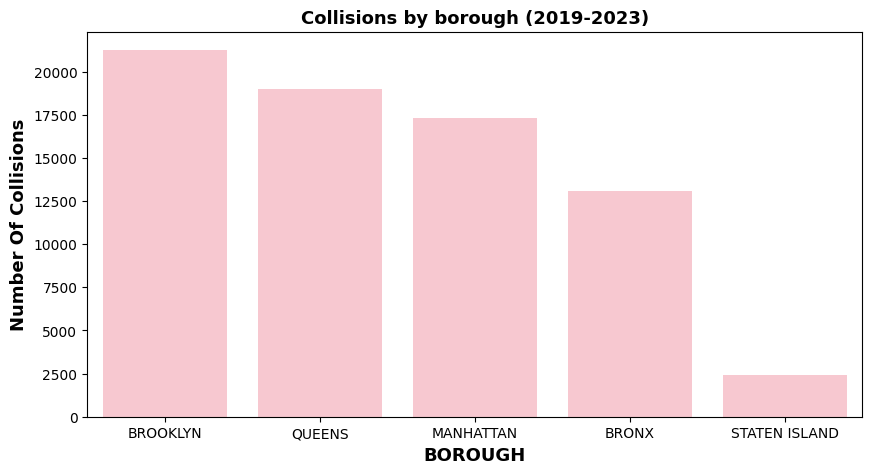

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=crashes_by_borough, x="BOROUGH", y="COUNT", palette = ['PINK'])
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("BOROUGH", fontweight="bold", fontsize=13)
plt.title("Collisions by borough (2019-2023)", fontweight="bold", fontsize=13)

plt.show()

**Takeaways**
*   There are the fewest collisions on Staten Island which makes sense as these collision frequencies tend to correlate with the overall populations of each borough. Staten Island is in fact the smallest borough in New York City by population, as it is the only borough with a population of less than a million, and has a population of a little under 500,000. This is surprising though given that Staten Island is the least transit connected borough, with only one singular subway rail line that isn't connected to any other subway in NYC. Thus, Staten Island as a borough has the highest rate of car ownership in the city.
*   Brooklyn and Queens are the city's most populated boroughs, and thus also have higher rates of car ownership in NYC. As these two boroughs are also the largest population wise, they are also the largest boroughs by geographic size, which might explain a high number of car accidents. Moreover, these two boroughs have expansive interstate and local highway networks, as well as the fact that Queens contains the city's two airports: LaGuardia and JFK. People overwhelmingly have to drive or take taxi cab services or ride shares to and from the airport, and on such congested roads, this might explain high collison incidence in Queens, and nearby Brooklyn.
* Manhattan is roughly 2/3 the population of Brooklyn but remains competitive likely due to the amount of people who need to commute there for work, school, and tourism as the center of activity in the metropolitan area. This is further reinforced by the collision incidence in the Bronx, which is the borough that has the second fewest collisions. The Bronx only has 25% less people than Manhattan, yet has 40% less automobile collisions than Manhattan, thus reinforcing the sheer dominance of Manhattan as the borough of hustle and bustle, and thus a slightly higher rate of collisions.

###2.2.2 Collisions by Streets
Which city streets should people be most cautious along?
Let us get the top 10 most dangerous streets according to these collision datapoints.



In [ ]:
streets = temp['ON STREET NAME'].value_counts().reset_index()
streets.sort_values(by='ON STREET NAME', ascending=False, inplace=True)
streets = streets.rename(columns={'index':'STREET', 'ON STREET NAME': 'COUNT'})
streets[:10]

,STREET,COUNT
0,3 AVENUE,436
1,BROADWAY,423
2,2 AVENUE,349
3,ATLANTIC AVENUE,316
4,BROADWAY,301
5,QUEENS BOULEVARD,262
6,3 AVENUE,247
7,NORTHERN BOULEVARD,245
8,1 AVENUE,219
9,2 AVENUE,214


Let's also plot the collision points along each of these streets to get a better visualization of the data.

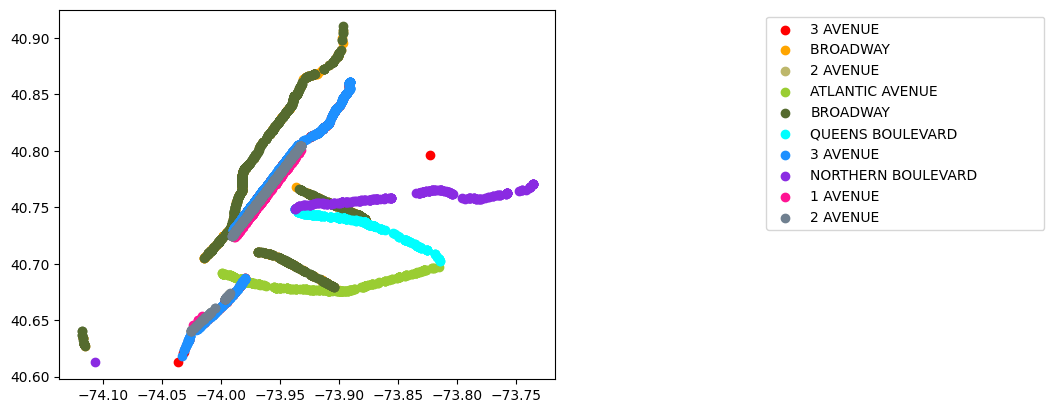

In [ ]:
import matplotlib

i = 0
longitudes = []
latitudes = []
colors=['red','orange','darkkhaki','yellowgreen','darkolivegreen','aqua','dodgerblue','blueviolet','deeppink','slategray']

for color in colors:
    street = streets['STREET'][i]

    longitude = df_cleaned.loc[(df_cleaned['ON STREET NAME']==street) | (df_cleaned['CROSS STREET NAME']==street)].LONGITUDE.dropna().values
    latitude = df_cleaned.loc[(df_cleaned['ON STREET NAME']==street) | (df_cleaned['CROSS STREET NAME']==street)].LATITUDE.dropna().values

    longitudes.extend(longitude)
    latitudes.extend(latitude)

    plt.scatter(longitude, latitude, color=color, label=street)
    i += 1

    if i==10:
        break

plt.legend(bbox_to_anchor=[2, 1])
plt.show()

**Takeaways**
*   These top 10 streets, which are **3rd Ave, Broadway, 2nd Ave, Atlantic Ave, Queens Boulevard, 1st Avenue, and Northern Boulevard.** (including some duplicates) tend to be long avenues or boulevards which makes sense as there is more room for collisions to occur. Given that these are avenues and boulevards, these are multi-lane streets that have higher speeds, higher traffic, and continuously transport a larger amount of people, thus might explaining these collision frequencies.
* These collision frequency points also make sense given that because these specific avenues and boulevards are long in nature and keep the general name as a main connector in a borough, they do also wind in shape and have more intersection points, some of which might be at weird turns and angles. Because of this, we might see how a higher amount of collisions happen at these particular streets.
* For example, Broadway is the single continuous, and longest single street in Manhattan, as it even spans the near entire length of Manhattan, and spans upward into the Bronx. Broadway is one of many important connection points for people to travel through Manhattan, whether that is within Manhattan or from the Bronx and Westchester County into Manhattan. Moreover, above Morningside Heights and below the Upper West Side, Broadway starts to wind and turn at a diagonal direction for much of its existence, creating more unique turns and collision points which makes it much more prone to people crash. Whether that is turning into these diagonal cross streets or differences in speed limits, we see higher collision incidence.
* For another example, Northern Boulevard and Queens Boulevard are the major thoroughfares for the borough of Queens. In fact, Northern Boulevards extends for a signifciant length beyond the boundaries of NYC into the Long Island suburbs. Most of the actual Northern Boulevard, which is nearly 74 miles,extends into eastern Long Island in Suffolk County, and does act as a connecting point from the suburbs into NYC. Queens Boulevard traverses through most of the busy neighborhoods in Queens via a unique diagonal angle, and is a six lane street with bustling traffic. In fact, both Northern Boulevard and Queens Boulevard for large portions exist as state highways with higher speeds, explaining the potential hazards and incidence of collisions.
* However, as we must note, we do recognize that this list of 10 most collision-prone streets contain duplicates that we were not able to distinguish properly in the pre-processing. In this section, we really only see 6 streets. This also does not help that streets and boroughs in different boroughs will share the same named street, even if there is no innate or immediate geographic connection, resulting in unique patterns in the heat map visualization.


###2.2.3 Plotting Collision Locations
Let's now get a better visualization of **where** these collisions are happening beyond a general singular street. We shall first create a baseline visualization by just plotting a scatterplot of these points, of all of the traffic collisions in this processed data set.

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


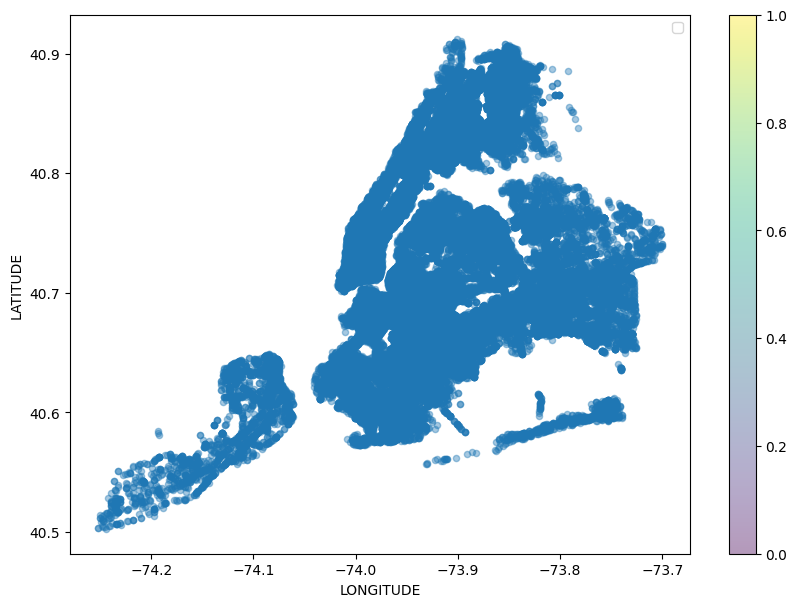

In [ ]:
temp = df_cleaned

temp.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7))
plt.legend()
plt.show()

This wasn't that helpful! We can see that there are collisions almost everywhere there is a road in NYC, and it doesn't help that all of the collision points plotted are the same color, so we cannot get a sense of any ingisht or pattern immediately from this visualization. There are too many datapoints for us to comprehend, so it would be more logical to create a **heatmap** of these points. The heatmap will change color by the frequency of points at a specific location or generalized area, so this will be beneficial in getting a better visual understanding of our data.
###2.2.4 Collisions Heatmap


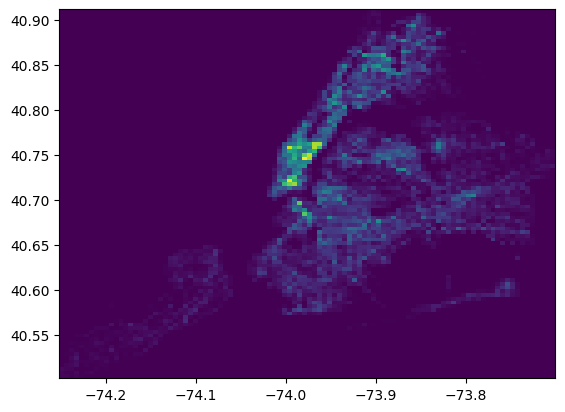

In [ ]:
longitudes, latitudes = df_cleaned['LONGITUDE'], df_cleaned['LATITUDE']

heatmap, xedges, yedges = np.histogram2d(longitudes, latitudes, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [ ]:
import matplotlib.figure as figure

temp = df_cleaned

temp['HOUR'] = temp['CRASH DATE'].dt.hour

days_of_week = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

def crash_heatmap_by_hours_day(day=0):
    fig = plt.figure(figsize=(10,10))

    title = 'Crashes By Hour On ' + days_of_week[day] + 's'

    fig.suptitle(title)

    times = temp.groupby('HOUR').count().index

    for i, time in zip(list(range(24)), times):

        data = temp.loc[(temp['HOUR'] == time)]
        if day > 0:
            data = data.loc[(temp['CRASH DATE'].apply(lambda x: x.weekday() == day))]

        longitude = data.LONGITUDE.dropna()
        latitude = data.LATITUDE.dropna()
        heatmap, xedges, yedges = np.histogram2d(longitude, latitude, bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        ax = fig.add_subplot(6, 4, i+1)
        ax.set_title("Hour " + str(i))
        ax.imshow(heatmap.T, extent=extent, origin='lower')

        ax.tick_params(axis='x',which='both',bottom='off',left='off',top='off',labelbottom='off')
        ax.tick_params(axis='y',which='both',left='off',right='off',labelleft='off')


Let's now use this function, `crash_heatmap_by_hours_day`, to view the accident collision heatmaps hour by hour during a weekday, such as Monday, and a day on the weekend such as Saturday. We will also reassign the days of the week so that Day 0 is Monday, Day 1 is Tuesday, etc. until Day 6 is Sunday.

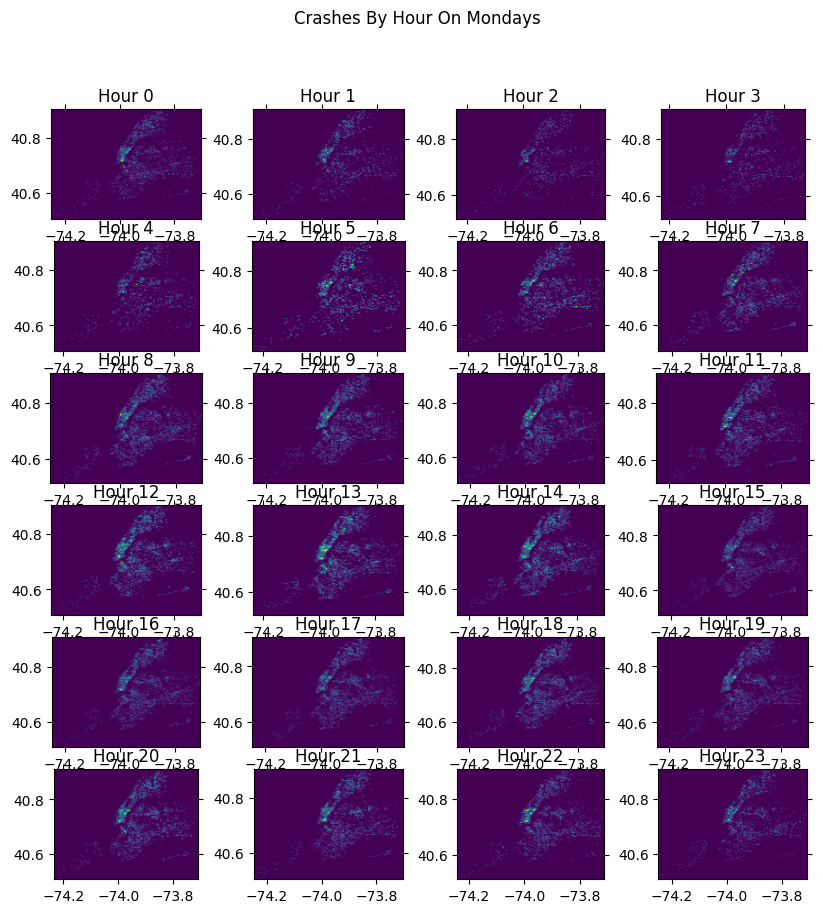

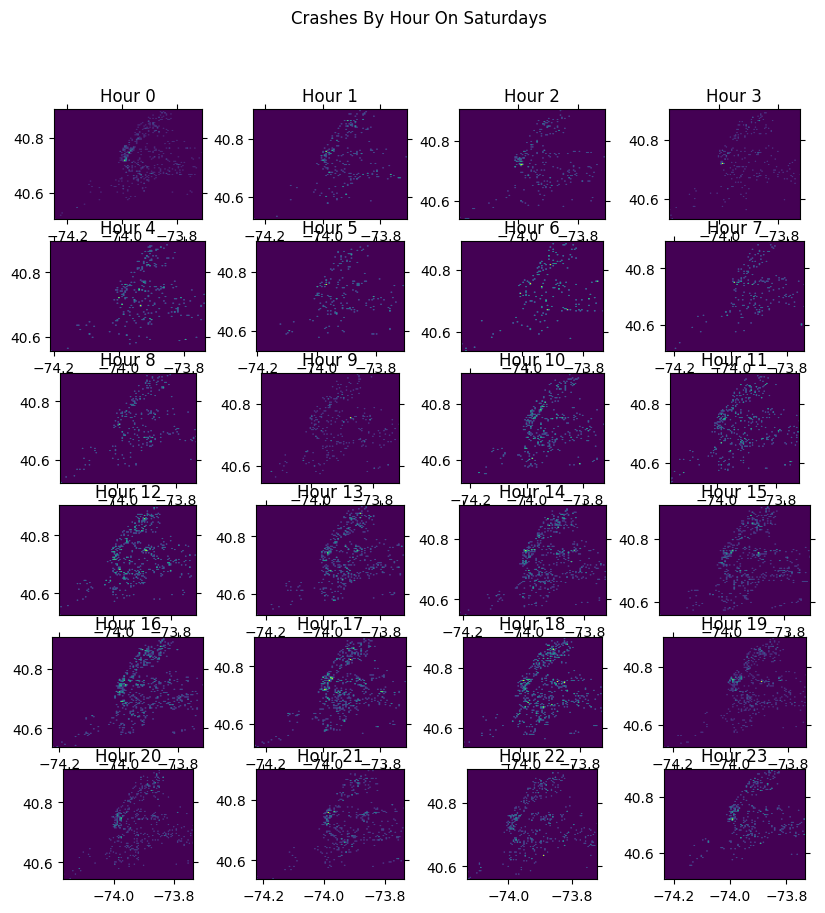

In [ ]:
crash_heatmap_by_hours_day(0)
crash_heatmap_by_hours_day(5)

**Takeaways**
* A lot of the mappings confirm our previous comments made earlier in this data analysis, such as the fact that from the hours of 1 am to 6 am, there is virtually very few traffic collisions going on, and on the weekdays, we see a gradual increase in the brightness of the mappings as the workday continues (9 am to 5 pm).
*   The mappings appear to be less bright on the weekend, which again makes sense given that there were fewer collisions overall on the non-working, religiously-observant, rest days of the week, which we already observed earlier in this data analysis.
*   The area with the most collisions appears to be within Manhattan, which lines up with what we observed earlier in the data analysis.
* An interesting mapping that stuck out was that at certain times of the day, two areas of Queens were brighter or equally as bright as Manhattan: the surrounding areas of the two NYC airports, both of which are in Queens (LaGuardia Airport and John F. Kennedy International Airport). This makes sense as these two areas outside of Manhattan direct a lot of traffic as people constantly fly in and out of NYC, thus being quite prone to traffic accidents.
* Moreover, at cerrtain times of the day, we can see that some traffic accidents don't necessarily happen on the land in NYC, but rather on the multiple bridges that transport thousands of people a day.

##2.3 Vehicle Types Involved in Collisions
Now let us explore more in depth about the kind of vehicles involved in such traffic accidents. What type of car are they? Trucks? Motorcycles? Normal cars? Here, we will sort our cleaned data frame to sort by the vehicle type, and then plot the frequencies of each vehicle type in the collision data via a barplot.

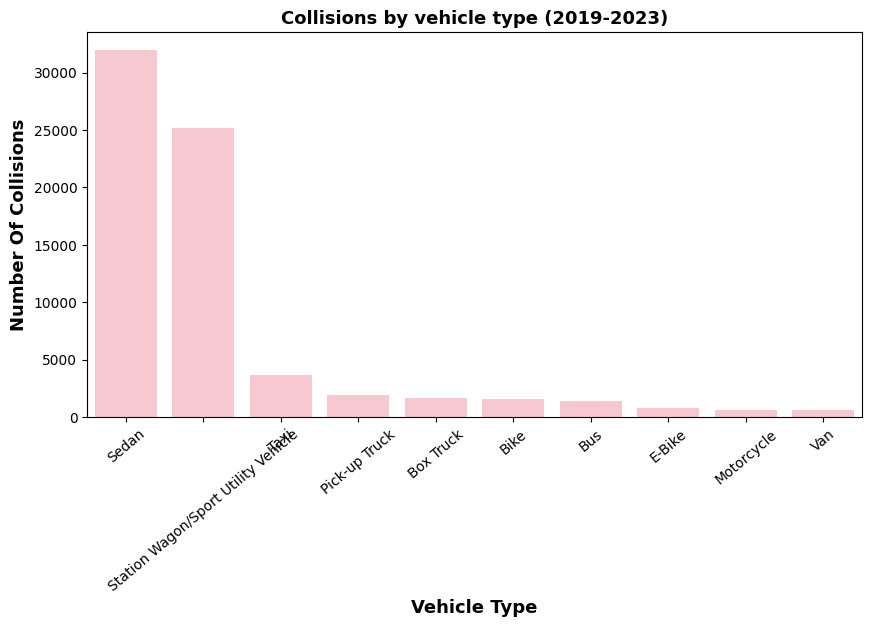

In [ ]:
temp = df_cleaned
vehicle_types = temp["VEHICLE TYPE CODE 1"].value_counts().reset_index()
vehicle_types = vehicle_types.head(10)
vehicle_types.columns = ['vehicle', 'count']

plt.figure(figsize=(10,5))
sns.barplot(data=vehicle_types, x="vehicle", y="count", palette = ['PINK'])
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Vehicle Type", fontweight="bold", fontsize=13)
plt.title("Collisions by vehicle type (2019-2023)", fontweight="bold", fontsize=13)
plt.xticks(rotation=40)

plt.show()

**Takeaways:**
* We see right away that the two most dominant vehicles involved in motor vehicle collisions are sedans and station wagons/sport utility vehicles (i.e. SUVs). By a long shot, this makes sense as these are the most popular type of cars driven on the road. Moreover, we see how these two popular classifications of vehicles are rather broad, and do not do much to explain more about different vehicle types that might contribute to crash frequency/likelihood. We see that station wagons and SUVs are grouped together, mainly due to the similar builds and features of the car. Moreover, sedans encompass a wide variety of cars of varying sizes such as a normal sedan as well as minivans. This does pose a curiosity as to how or why collision data is classified with such broad categories, if it is helpful to general policy makers or local law enforcement.
* We see how a bunch of the other vehicle types are much less frequent to get into vehicle collisions, such as taxis, pick-up trucks, box-trucks, bikes, and buses. These seem to be justified as many of these vehicle types, such as taxis, box trucks, and buses, are driven by a small subset of people for a specific purpose, and trained by general local authorities with greater oversight than a normal, standard car driver. Because of the fewer amount of these vehicles on the road comparatively, and these specific trainings and cultures that come with operating these vehicles, it is interesting noting how there appear to be less crashes.
* It is also worth noting that due to the time constraints of this project and data analysis, we only had the opportunity to look for collision frequency among `VEHICLE TYPE CODE 1`. In this data set, for every row representing a collision, there is both a `VEHICLE TYPE CODE 1` and `VEHICLE TYPE CODE 2`, and `VEHICLE TYPE CODE 1` typically represents the initial vehicle that perpetrated the crash, and `VEHICLE TYPE CODE 2` is the vehicle that got impacted or the short end of the stick.
  * Because of this notice, it is really insightful to see in this section that majority of vehicles that do perpetrate most of the collisions in NYC, among this data set, are sedans. While they are a very popular vehicle classification, this is worth looking into in the future.
  * If we were to filter the data and do this similar data analysis to `VEHICLE TYPE CODE 2`, we might see a difference in what types of vehicles are more likely to be crashed into in these collisions.
  * This also reinforces the infrequency of the crashes being perpetrated by, taxis, pick-up trucks, etc., and that these vehicles are much less likely to crash into other vehicles because of the rigorous training and extra caution required to man these vehicle types.

# Part 2.4: Correlation Matrix

In this section, we will construct a correlation matrix to see if there are correlated relationships between the mutliple variables we have at hand in this dataset, many of which are categorical, and which broadly relate to time, location, collision impact (injuries and/or deaths), and vehicle types.

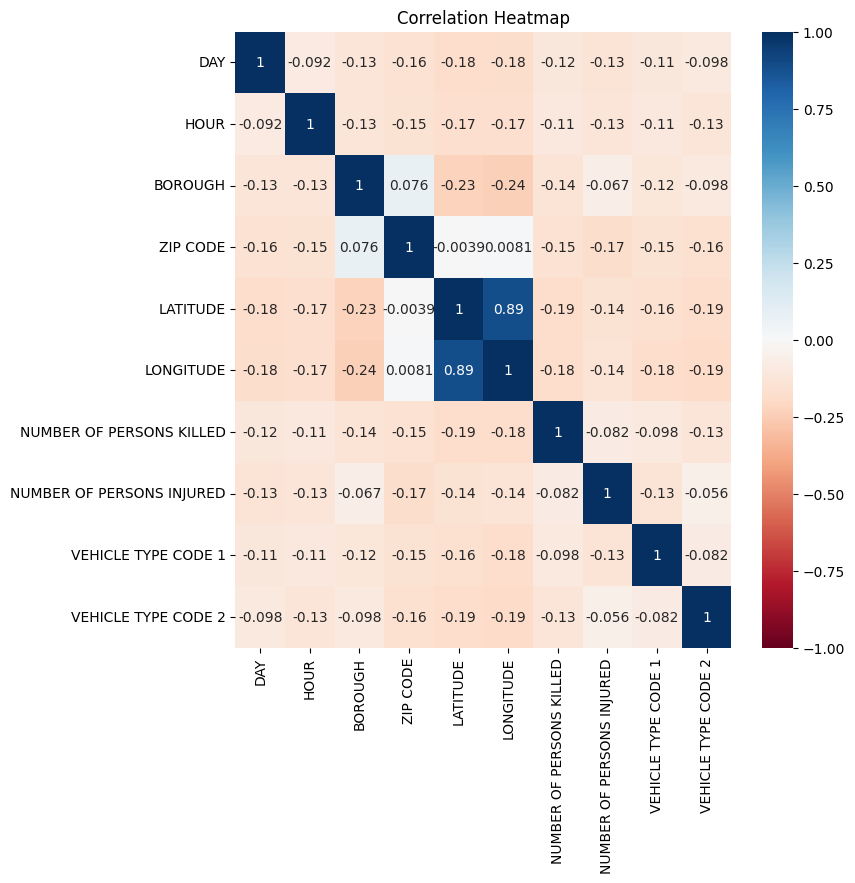

In [ ]:
df_cleaned['DAY'] = df_cleaned['CRASH DATE'].apply(lambda x: x.weekday())
df_cleaned['HOUR'] =  df_cleaned['CRASH DATE'].dt.hour
corr_data = df_cleaned[['DAY', 'HOUR','BOROUGH','ZIP CODE','LATITUDE','LONGITUDE','NUMBER OF PERSONS KILLED','NUMBER OF PERSONS INJURED','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2']]
corr_data = corr_data.apply(lambda x: x if isinstance(x, int) or isinstance(x, float) else x.factorize()[0]).corr()


corr_mat=corr_data.corr()
plt.figure(figsize = (8,8))

sns.heatmap(corr_mat, annot =True, cmap = 'RdBu', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.show()

Here, we assembled a correlation matrix of the data at this point in the analysis based on the main attributes: time (`DAY`, `HOUR`), location (`BOROUGH`, `ZIP CODE`, `LATITUDE`, `LONGITUDE`), collision impact (`NUMBER OF PERSONS KILLED`, `NUMBER OF PERSONS INJURED`), and vehicle type (`VEHICLE TYPE CODE 1`, which is usually the perpetrator of the crash, and `VEHICLE TYPE CODE 2`, which is usually the victim of the crash).

Based on our correlation matrix, we see that for the most part, we should feel not too concerned about multicolinearity of our variables in the data set, as most of the correlation coefficients between variables in this data set are below 0.25, which is a very good sign of confidence and reassurance. However, the only variables that we do see high correlation values are between `LONGITUDE` and `LATITUDE`, which makes sense because we are focusing on accidents strictly in New York City, which is a limited geographic range. The lack of correlation between these variables in the data set is reassuring about the quality of data we have, and the direction we are taking in this data analysis. This also gives us the proper confidence to move forward in this project, where we will engage and build machine learning models to further prompt our understanding of the objective.

#**Part 3: Modeling**

In this part of the project, we will prompt greater expertise in the field of data science beyond the ETL processing and exploratory data analysis. We will try to build, train, and test a few machine learning models so we can better answer our objective.

We will seek to predict whether people in accidents have been injured/killed or not. We will train our model with data using the categorical variables `HOUR`, `DAY`, `VEHICLE TYPE CODE 1`, `VEHICLE TYPE CODE 2`, and `BOROUGH`, which encompasses location, time, and types of vehicles.

In order to do so, we first will use a **One-Hot Encoding** to label the unique categorical variables, given the unique, rather cateogorical nature of collision data. The One-Hot Encoding will give us a better idea of manipulating our data to build our model, and greater numerical parameters to train the data/model. We will also evaluate and re-size the number of components of the data via this One-Hot Encoding through a **Principle Component Analysis (PCA)**. We will then run a Linear Regression model to predict, and based on its accuracy (using R^2 score, and mean of squared errors (MSE)) and our hypothesis of why the result occurred, we will diversify into more complex models that can give higher accuracy.

# 3.1: One Hot Encoding and Principle Component Analysis (PCA)
Let us start off with a **One-Hot Encoding**, then apply a **Principle Component Analysis (PCA)**. A One-Hot Encoding was a better option than Target Encoding because there are too many unique values the categorical variables targeting the probability of each value of them would be too complicated. We also tried to include street names as an attribute for the one-hot encoding but realized that there are too many unique values without much correlation to time and Google Colab would often crash because of the large dataframe. We will import the necessary packages to run this modeling.

In [ ]:
#questions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

Also, after exploring different data analysis, we had a few more dataframe fixes to tailor to the model prediction we were trying to look for.

In [ ]:
df_cleaned_modeling = df_cleaned
df_cleaned_modeling = df_cleaned_modeling.dropna(subset=['CONTRIBUTING FACTOR VEHICLE 2'], how='all')
df_cleaned_modeling['INJURED/KILLED'] = ((df_cleaned_modeling['NUMBER OF PERSONS INJURED'] > 0.0) | (df_cleaned_modeling['NUMBER OF PERSONS KILLED'] > 0.0)).astype(int)
df_cleaned_modeling = df_cleaned_modeling[["HOUR", "DAY", "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "BOROUGH", "INJURED/KILLED"]]
df_cleaned_modeling

<ipython-input-50-94d37b68eff1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_modeling['INJURED/KILLED'] = ((df_cleaned_modeling['NUMBER OF PERSONS INJURED'] > 0.0) | (df_cleaned_modeling['NUMBER OF PERSONS KILLED'] > 0.0)).astype(int)


,HOUR,DAY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,BOROUGH,INJURED/KILLED
3,15,6,Sedan,Sedan,QUEENS,1
4,14,3,Sedan,Station Wagon/Sport Utility Vehicle,MANHATTAN,0
6,12,5,Sedan,Ambulance,BROOKLYN,0
7,23,3,Sedan,Bike,BROOKLYN,1
8,19,2,Station Wagon/Sport Utility Vehicle,Bike,MANHATTAN,1
...,...,...,...,...,...,...
73081,14,1,Sedan,Station Wagon/Sport Utility Vehicle,MANHATTAN,0
73082,17,5,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,BRONX,0
73083,4,5,Sedan,Sedan,BRONX,0
73084,16,5,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,BROOKLYN,0


In [ ]:
#one-hot encoding on "HOUR", "DAY", "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "BOROUGH"
one_hot_accidents_df = pd.get_dummies(df_cleaned_modeling, columns = ["HOUR", "DAY", "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "BOROUGH"])

one_hot_accidents_df.head(5)

,INJURED/KILLED,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23,DAY_0,DAY_1,DAY_2,DAY_3,DAY_4,DAY_5,DAY_6,VEHICLE TYPE CODE 1_12 passage,VEHICLE TYPE CODE 1_2 dr sedan,VEHICLE TYPE CODE 1_3-Door,VEHICLE TYPE CODE 1_4 dr sedan,VEHICLE TYPE CODE 1_994,VEHICLE TYPE CODE 1_AMB,VEHICLE TYPE CODE 1_AMBU,VEHICLE TYPE CODE 1_AMBUL,VEHICLE TYPE CODE 1_AMBULANCE,VEHICLE TYPE CODE 1_AMBULANE,VEHICLE TYPE CODE 1_AMBULANVE,VEHICLE TYPE CODE 1_Amb,VEHICLE TYPE CODE 1_Ambu,VEHICLE TYPE CODE 1_Ambul,VEHICLE TYPE CODE 1_Ambulance,VEHICLE TYPE CODE 1_Armored Truck,VEHICLE TYPE CODE 1_BUCKE,VEHICLE TYPE CODE 1_Beverage Truck,VEHICLE TYPE CODE 1_Bike,VEHICLE TYPE CODE 1_Box T,VEHICLE TYPE CODE 1_Box Truck,VEHICLE TYPE CODE 1_Box t,VEHICLE TYPE CODE 1_Bulk Agriculture,VEHICLE TYPE CODE 1_Bus,VEHICLE TYPE CODE 1_CAN,VEHICLE TYPE CODE 1_CAT.,VEHICLE TYPE CODE 1_CATAPILLAR,VEHICLE TYPE CODE 1_CMIXER,VEHICLE TYPE CODE 1_COM DELIVE,VEHICLE TYPE CODE 1_COMME,VEHICLE TYPE CODE 1_COMMERCIAL,VEHICLE TYPE CODE 1_Carry All,VEHICLE TYPE CODE 1_Chassis Cab,VEHICLE TYPE CODE 1_Comme,VEHICLE TYPE CODE 1_Commercial,VEHICLE TYPE CODE 1_Concrete Mixer,VEHICLE TYPE CODE 1_Convertible,VEHICLE TYPE CODE 1_D/V WB,VEHICLE TYPE CODE 1_DELIVERY T,VEHICLE TYPE CODE 1_DELV,VEHICLE TYPE CODE 1_DELV WH,VEHICLE TYPE CODE 1_DUMP,VEHICLE TYPE CODE 1_DUMPTRUCK,VEHICLE TYPE CODE 1_Deliv,VEHICLE TYPE CODE 1_Delivery,VEHICLE TYPE CODE 1_Delivery t,VEHICLE TYPE CODE 1_Dump,VEHICLE TYPE CODE 1_Dump truck,VEHICLE TYPE CODE 1_E-BIK,VEHICLE TYPE CODE 1_E-Bik,VEHICLE TYPE CODE 1_E-Bike,VEHICLE TYPE CODE 1_E-Sco,VEHICLE TYPE CODE 1_E-Scooter,VEHICLE TYPE CODE 1_ELECTRIC C,VEHICLE TYPE CODE 1_F550,VEHICLE TYPE CODE 1_FDNY,VEHICLE TYPE CODE 1_FDNY AMBUL,VEHICLE TYPE CODE 1_FDNY FIRE,VEHICLE TYPE CODE 1_FDNY FIRET,VEHICLE TYPE CODE 1_FDNY TRUCK,VEHICLE TYPE CODE 1_FDNY Vehic,VEHICLE TYPE CODE 1_FDNY- Fire,VEHICLE TYPE CODE 1_FIRE,VEHICLE TYPE CODE 1_FIRE TRUCK,VEHICLE TYPE CODE 1_FIRETRUCK,VEHICLE TYPE CODE 1_FLAT,VEHICLE TYPE CODE 1_FORD,VEHICLE TYPE CODE 1_FORK LIFT,VEHICLE TYPE CODE 1_FORKLIFT,VEHICLE TYPE CODE 1_Fdny engin,VEHICLE TYPE CODE 1_FedEx box,VEHICLE TYPE CODE 1_Fire,VEHICLE TYPE CODE 1_Fire Truck,VEHICLE TYPE CODE 1_Firetruck,VEHICLE TYPE CODE 1_Flat Bed,VEHICLE TYPE CODE 1_Flat Rack,VEHICLE TYPE CODE 1_Ford,VEHICLE TYPE CODE 1_Ford f150,VEHICLE TYPE CODE 1_Ford sprin,VEHICLE TYPE CODE 1_G PSD,VEHICLE TYPE CODE 1_GARBAGE TR,VEHICLE TYPE CODE 1_Garbage or Refuse,VEHICLE TYPE CODE 1_Government,VEHICLE TYPE CODE 1_Hopper,VEHICLE TYPE CODE 1_LIMO,VEHICLE TYPE CODE 1_Lift,VEHICLE TYPE CODE 1_Lift Boom,VEHICLE TYPE CODE 1_Livestock Rack,VEHICLE TYPE CODE 1_Log,VEHICLE TYPE CODE 1_MACK,VEHICLE TYPE CODE 1_MOPD,VEHICLE TYPE CODE 1_MOPED,VEHICLE TYPE CODE 1_MOTOR SCOO,VEHICLE TYPE CODE 1_MTA BUS,VEHICLE TYPE CODE 1_Moped,VEHICLE TYPE CODE 1_Mopped,VEHICLE TYPE CODE 1_Motorbike,VEHICLE TYPE CODE 1_Motorcycle,VEHICLE TYPE CODE 1_Motorized Home,VEHICLE TYPE CODE 1_Motorscoot,VEHICLE TYPE CODE 1_Motorscooter,VEHICLE TYPE CODE 1_Multi-Wheeled Vehicle,VEHICLE TYPE CODE 1_NAVIG,VEHICLE TYPE CODE 1_NTTRL,VEHICLE TYPE CODE 1_NYC AMBULA,VEHICLE TYPE CODE 1_NYS AMBULA,VEHICLE TYPE CODE 1_Open Body,VEHICLE TYPE CODE 1_PAS,VEHICLE TYPE CODE 1_PC,VEHICLE TYPE CODE 1_PERM,VEHICLE TYPE CODE 1_PICKUP,VEHICLE TYPE CODE 1_PICKUP TRU,VEHICLE TYPE CODE 1_PK,VEHICLE TYPE CODE 1_POWER SHOV,VEHICLE TYPE CODE 1_Pallet,VEHICLE TYPE CODE 1_Pedicab,VEHICLE TYPE CODE 1_Pick up Tr,VEHICLE TYPE CODE 1_Pick wh,VEHICLE TYPE CODE 1_Pick-up Truck,VEHICLE TYPE CODE 1_Pickup tru,VEHICLE TYPE CODE 1_Pickup with mounted Camper,VEHICLE TYPE CODE 1_Post offic,VEHICLE TYPE CODE 1_RV,VEHICLE TYPE CODE 1_Refrigerated Van,VEHICLE TYPE CODE 1_SANIT,VEHICLE TYPE CODE 1_SCHOO,VEHICLE TYPE CODE 1_SCHOOL BUS,VEHICLE TYPE CODE 1_SCOOTER,VEHICLE TYPE CODE 1_SEGWA,VEHICLE TYPE CODE 1_SKID LOADE,VEHICLE TYPE

Here we just did our One-Hot Encoding, which has numerized every unique in the categorical columns, which will now be helpful for further modeling.

A lot of pre-processing steps are being done at the moment, but in order to run the Logistical Regression model, we only retained columns that are in `int`, `float`, or `uint8` form. This allows for a smooth, optimal model so it doesn't crash or be faulty when we actually try to assess the validity of the model. Then, we created the features and target based on our objective, which is to predict the most likely time of accidents based on the frequency of the location.

In [ ]:
one_hot_accidents_df = one_hot_accidents_df.select_dtypes(include=['int64', 'float64', 'uint8'])
one_hot_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41843 entries, 3 to 73086
Columns: 522 entries, INJURED/KILLED to BOROUGH_STATEN ISLAND
dtypes: int64(1), uint8(521)
memory usage: 21.4 MB


In [ ]:
features = one_hot_accidents_df.drop('INJURED/KILLED', axis = 1)

target = one_hot_accidents_df['INJURED/KILLED']

We created our`train` and `test` data with an **80/20 split** and did an initial PCA fit to find the explained variance ratios and cumulative explained variance ratios. These will be used to find the ideal number of components later in a graph to capture 80% of variance, which is an ideal threshold to meet to have a valid training set.

In [ ]:
#train the data split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.8, random_state=seed)

In [ ]:
pca = PCA()

#Address scale-invariance
X_train_scaled = StandardScaler().fit_transform(X_train)

#Instantiate and Fit PCA
X_train_init_pca = pca.fit(X_train_scaled)

In [ ]:
#Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = X_train_init_pca.explained_variance_ratio_

#Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)

In order to capture 80% of the variance through our PCA fit, we created a graph **"Cumulative Explained Variance Ratio vs. Number of Components"** to find the number of components that intersects with the 80% threshold.

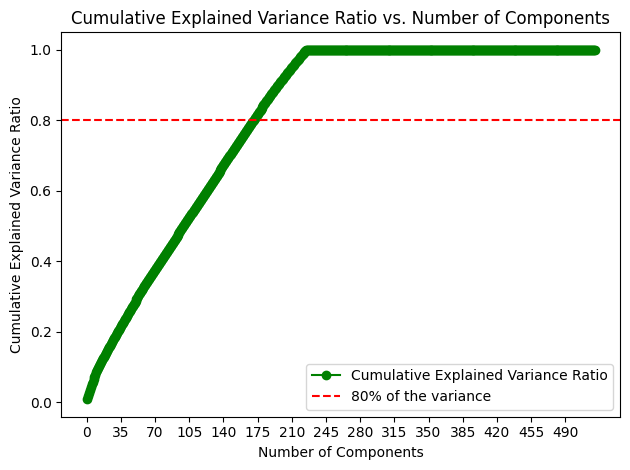

In [ ]:
#plot the cumulative explained variance ratio with the number of components to find the best number of components to refit the sets
plt.plot(range(0, len(cum_evr)), cum_evr, color='g', marker='o', linestyle='-', label='Cumulative Explained Variance Ratio')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% of the variance')

plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(0, len(cum_evr), 35))
plt.legend()

plt.tight_layout()
plt.show()

From this plot, we see that the optimal number of components is around **175**. We should therefore choose **175 components** as the *minimum number of components* that will meet our minimum cumulative explained variance ratio, as it meets the 80% explained variance threshold.

In [ ]:
#Refit and transform on train set and test set
n_components = 175
pca_temp = PCA(n_components=n_components)
X_test_set = StandardScaler().fit_transform(X_test)

X_train_final_pca = pca_temp.fit_transform(X_train_scaled)
X_test_final_pca = pca_temp.transform(X_test_set)

#3.2 Logistic Regression
We can now attempt to apply a **Logistic Regression** model to better predict the incidence of common correlation with our categorical variables, of which there are many. We will build this regression with with encoded data from the PCA-transformed dataset. This will be our baseline model in this data analysis, and we will compare the future models we will build, to this model.

In [ ]:
# Initialize the Logistic Regression Model
lr2 = LogisticRegression(None, multi_class='ovr',max_iter=5000)

# Fit the Logistic Regression using the training data from the PCA
lr2.fit(X_train_final_pca, y_train)

# Calculate our prediction values
y_pred = lr2.predict(X_test_final_pca)

test_acc = lr2.score(X_test_final_pca, y_test)
rf_confusion = confusion_matrix(y_test, y_pred)

print('Test Accuracy: ' + str(test_acc))
print('True Positive: ' + str(rf_confusion[0][0]))
print('False Positive: ' + str(rf_confusion[0][1]))
print('True Negative: ' + str(rf_confusion[1][0]))
print('False Negative: ' + str(rf_confusion[1][1]))

Test Accuracy: 0.749395070948469
True Positive: 20718
False Positive: 1041
True Negative: 7348
False Negative: 4368


We see the Test Accuracy set scored highly, which indicate that the correlation between these sets and the logistical regression model scored well. This model scored well due to the binary nature of our data set, which makes sense as that is exactly what a logistic regression model does: being rooted in binary classification. This does pose a question as to whether this may be attributed more so to the person being injured in the collision or not, which at the moment we cannot really tell.

We believe the errors could have come from having more than 200 categorical values in the dataset caused by the one-shot model. The PCA on the train and test sets, which according to our **"Cumulative Explained Variance Ratio vs. Number of Components"** graph captures 80% of the variance, may have significantly increased the correlation. However, having a spread out data for evaluation could cause a lower overall accuracy in the prediction model.

#3.3 Gradient Boosting Classifier
Based on our really high mean-squared errors from the linear regression, this prompted us to explore other forms of regression, such as a **Gradient Boosting Classifier**. We will use `XGBClassifier` to better fit the data, see the same metrics to measure the success of the model, and then we will apply hyperparameters to improve the validity of the model.

In [ ]:
#Bulid a XGBRegressor Model
xgbr = XGBClassifier(eta=0.1, max_depth=10, seed=42)

#Fit the data to fit the new model
xgbr.fit(X_train_final_pca, y_train)

#Calculate the prediction values
xgbr_y_pred = xgbr.predict(X_test_final_pca)

#Evaluate our model
xgbr_acc_test = xgbr.score(X_test_final_pca, y_test)
xgbr_rf_confusion = confusion_matrix(y_test, xgbr_y_pred)

print('Test Accuracy: ' + str(xgbr_acc_test))
print('True Positive: ' + str(xgbr_rf_confusion[0][0]))
print('False Positive: ' + str(xgbr_rf_confusion[0][1]))
print('True Negative: ' + str(xgbr_rf_confusion[1][0]))
print('False Negative: ' + str(xgbr_rf_confusion[1][1]))

Test Accuracy: 0.5714413741598208
True Positive: 11106
False Positive: 10653
True Negative: 3693
False Negative: 8023


From the **Gradient Boosting Classification** model, we actually see a lower value in Test accuracy. This might be due to the potential risk of underfitting the data, as Gradient Boosting Classifiers being an ensemble model, might not be able to properly tell us what relationships underly the data. Our data set has a plethora of categorical variables and values, which this model does not do the best at capturing the validity of such.

Because of this we will try a different ensemble method: a **Random Forest Classification** to check for improvement in the model.

A note: Due to time constraints, we were unable to perform the necessary hyperparameter tuning that is necessary for a Gradient Boosting Classifier, that would mitigate such potential underfitting/added complexity.

#3.4: Random Forest Classifier

Now that we see this, let us implement a **Random Forest Classifier**, a different form of a classification model.

In [ ]:
#Build a RandomForestRegressor Model
rfc = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)

#Fit the data to train the model
rfc.fit(X_train_final_pca, y_train)

#Calculate the prediction values
rfc_pred = xgbr.predict(X_test_final_pca)

#Evaluate our model
rfc_acc_test = rfc.score(X_test_final_pca, y_test)
rfc_rf_confusion = confusion_matrix(y_test, rfc_pred)

print('Test Accuracy: ' + str(rfc_acc_test))
print('True Positive: ' + str(rfc_rf_confusion[0][0]))
print('False Positive: ' + str(rfc_rf_confusion[0][1]))
print('True Negative: ' + str(rfc_rf_confusion[1][0]))
print('False Negative: ' + str(rfc_rf_confusion[1][1]))

Test Accuracy: 0.7629574309185959
True Positive: 11106
False Positive: 10653
True Negative: 3693
False Negative: 8023


From this, we can see that our values of the Random Forest Classifier model have slightly improved the overall accuracy. The test accuracy was significantly better than the score accuracy of the Gradient Boosting Classifier, and was better than the baseline Logistic Regression model.


#**Part 4: Conclusion**

**Here were some of our main takeaways:**

1. Location is a complex categorical variable to work on. Part of the reason we believe there was a high number for our RMSE value was because there were so many labels but so few rows that matched the labels to evaluate the frequency. Another reason is the large number of the time. Because we converted the timestamp that represented from year to second, the values were in the range around 10^10. Therefore, if any margin of error were to occur, the value would be significantly amplified in the MSE and MAE.
2. The most frequent number of collisions occur at 8 AM and peaks during 5 PM (rush hour). They also tend to occur more on weekdays overall and is most dense in the area just south of Central Park. There have been fewer collisions since 2019, and generally fewer during April, November, and December.
3. Based on this, we see that our ensemble models performed better than our baseline Linear Regression model. In fact, our Gradient Boosting Regression had the best accuracy, a testament to its corrective and sequential nature as a regression model.

